$$\text{This is the cutdown companion Jupyter notebook of Chapter 6, Beyond Born Oppenheimer, of the book titled:}$$
$$\text{ "Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.}$$

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#6. Beyond Born-Oppenheimer


# Technical requirements




## Installing NumPy, SciPy and math modules

Install NumPy with the following command:

In [ ]:
pip install numpy

Install SciPy with the following command:

In [ ]:
pip install scipy

Import NumPy with the following command:

In [ ]:
import numpy as np

Import Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python with the following command:



In [ ]:
import matplotlib.pyplot as plt

Import the SciPy special Hermite polynomials with the following command:

In [ ]:
from scipy.special import hermite

Import the mat  h factorial function with the following command:

In [ ]:
from math import factorial

# 6.1. Non-Born-Oppenheimer molecular Hamiltonian

## Internal Hamiltonian operator

### Explicitly correlated all-particle Gaussian functions

## Energy minimization

# 6.2. Vibrational frequency analysis calculations

## Modeling the vibrational-rotational levels of a diatomic molecule


In [ ]:
def N(v):
  return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

In [ ]:
def Psi(v, x):
  return N(v)*hermite(v)(x)*np.exp(-0.5*x**2)

In [ ]:
def plot(n):
  fig, ax = plt.subplots(figsize=(n+1,n+1))

  # Range of x
  xmax = np.sqrt(2*n+1)
  x = np.linspace(-xmax, xmax, 1000)

  for v in range(n):
     
    # plot potential energy function 0.5*x**2
    ax.plot(x,0.5*x**2,color='black')
    
    # plot spatial probabilities psi squared for each energy level
    ax.plot(x,Psi(v,x)**2 + v + 0.5)
    
    # add lines and labels
    ax.axhline(v + 0.5, color='gray', linestyle='-') 
    ax.text(xmax, 1.2*(v+0.5), f"v={v}")

  ax.set_xlabel('x')
  ax.set_ylabel('$|\psi_v(x)|^2$')

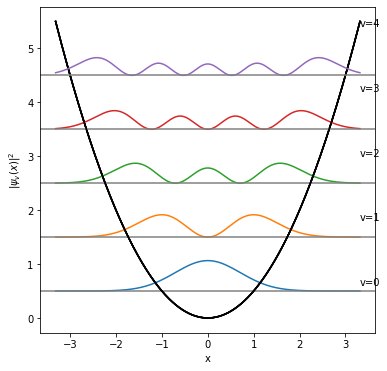

In [ ]:
plot(5)

Figure 6.5 – Potential energy (black parabola) and spatial probabilities (color) of the normalized quantum harmonic oscillator wavefunctions for $v=0$ to $v=4$



In [ ]:
def Frot(J, Be, De, He, show=False):
  F = Be*J*(J+1) + De*J**2*(J+1)**2 - He*J*3*(J+1)**3*10e-5
  if show:
    print("{} {:.2f}".format(J, F))
  return F

In [ ]:
# Source of the ground rotational state E(v,J=0) energy: [Komasa]
# Source of the constants data Ee, Be, De, He, and rms: [Campargue]

#      v   E(v,J=0)    Ee          Be         De        He     rms
rov = {0: (36118.0696, 0.0,        59.33289, -0.045498, 4.277, 3.4), 
       1: (31956.9034, 4161.1693,  56.37318, -0.043961, 4.168, 3.2),
       2: (28031.0670, 8087.0058,  53.47892, -0.042523, 4.070, 3.2),
       3: (24335.6787, 11782.3940, 50.62885, -0.041175, 3.963, 3.2),
       4: (20867.7039, 15250.3688, 47.79997, -0.039927, 3.846, 3.2),
       5: (17626.1400, 18491.9328, 44.96596, -0.038795, 3.717, 3.2),
       6: (14612.2901, 21505.7826, 42.09566, -0.037808, 3.571, 3.1),
       7: (11830.1543, 24287.9184, 39.15105, -0.037004, 3.399, 3.1),
       8: (9286.9790,  26831.0937, 36.08416, -0.036451, 3.187, 3.1),
       9: (6994.0292,  29124.0436, 32.83233, -0.036251, 2.902, 3.2)}

In [ ]:
print("v  E(v,J=0)    E(v,J=1)    BO Diff.")
for v in range(10):
    E0 = rov[v][0] - Frot(0, rov[v][2], rov[v][3], rov[v][4])
    E1 = rov[v][0] - Frot(1, rov[v][2], rov[v][3], rov[v][4])
    print("{}  {:.4f}  {:.4f}  {:.4f}".format(v, E0, E1, E0 - E1))

v  E(v,J=0)    E(v,J=1)    BO Diff.
0  36118.0696  35999.5961  118.4735
1  31956.9034  31844.3429  112.5605
2  28031.0670  27924.2890  106.7780
3  24335.6787  24234.5952  101.0835
4  20867.7039  20772.2729  95.4310
5  17626.1400  17536.3722  89.7678
6  14612.2901  14528.2586  84.0315
7  11830.1543  11752.0084  78.1459
8  9286.9790  9214.9641  72.0149
9  6994.0292  6928.5165  65.5127


Figure 6.6 – Vibrational energy levels of the hydrogen molecule for $v=0,…,9$ , $J=0$ and $J=1$

## Computing all vibrational-rotational levels of a molecule

### Optimizing the geometry of the molecule

### Calculating a force constant Hessian matrix

### Converting to mass weighted Cartesian coordinates 

### Diagonalizing the mass weighted Hessian matrix 

`import psi4`

`psi4.core.set_output_file('psi_CO2_output.txt', False)`

`psi4.set_memory('500 MB')`

`co2 = psi4.geometry("""`

`symmetry c1`

`0 1`

`C 1.6830180 -0.4403696 3.1117942`

`O 0.5425545 -0.2216001 2.9779653`

`O 2.8186228 -0.6587208 3.2810031`

`units angstrom`

`""")`



`psi4.set_options({'reference': 'rhf'})`

`psi4.optimize('scf/cc-pvdz', molecule=co2)`


Optimizer: Optimization complete!

-187.65250930298149

`scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=co2, return_wfn=True)`

`for i in range(4):`
 `   print(scf_wfn.frequencies().get(0,i))`

761.4181081677268

761.4181227549785

1513.1081106509557

2579.8280005025586

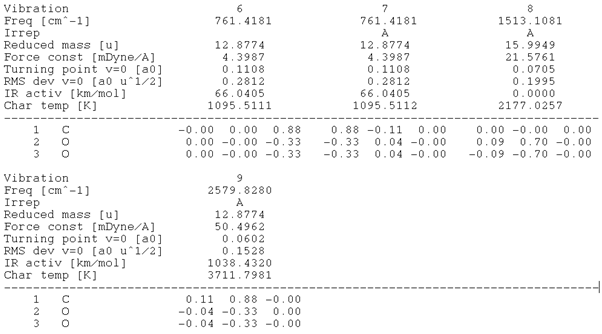

Figure 6.7 – Vibrational frequency analysis of the ($\mathrm{CO}_{2}$) molecule with Psi4 (extract)

# 6.3. Vibrational spectra for ortho-para isomerization of hydrogen molecules

# Summary

# Questions

1.  True or False: The computational complexity of determining molecular structure and vibrational spectra increases exponentially as a function of the number of atoms.



In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. What does the acronym ECG stand for?

In [ ]:
#@title Enter your answer as a string of characters or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "2.	Explicitly correlated Gaussian function"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. True or False: In the harmonic oscillator approximation, the force required to extend the spring is proportional to the extension.

In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


4.	True or False: When the vibrational energy is high, the harmonic oscillator approximation is no longer valid.

In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


5.	True or False: The geometry of the molecule used for vibrational analysis must first be optimized so that the atoms are in equilibrium and have no momentum.

In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again
